In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**In this chapter**

- You learn about hash tables, one of the most useful basic data structures. Hash tables have many uses; this chapter covers the common use cases.                     
- You learn about the internals of hash tables: implementation, collisions, and hash functions. This will help you understand how to analyze a hash table’s performance.

> **在本章中**
>
> - 你学习了哈希表，它是最有用的基本数据结构之一。散列表有许多用途；本章涵盖了常见的使用情况。                    
> - 你将了解到散列表的内部结构：实现、碰撞和hash函数。这将有助于你了解如何分析哈希表的性能。

Suppose you work at a grocery store. When a customer buys produce, you have to look up the price in a book. If the book is unalphabetized, it can take you a long time to look through every single line for *apple*. You’d be doing simple search from [chapter 1](ms-local-stream://EpubReader_AC72D530066DA71DBA289EF8C2FE2E4D915D872E9F520716C4ECA9F5D94B14/Content/OEBPS/kindle_split_007.xhtml#ch01), where you have to look at every line. Do you remember how long that would take? O(*n*) time. If the book is alphabetized, you could run binary search to find the price of an apple. That would only take O(log *n*) time.

> 假设你在一家杂货店工作。当顾客购买农产品时，你必须在一本书上查找价格。如果这本书没有按字母顺序排列，你可能要花很长时间来翻阅每一行的*苹果*。你会从[第1章](ms-local-stream://EpubReader_AC72D530066DA71DBA289EF8C2FE2E4D915D872E9F520716C4ECA9F5D94B14/Content/OEBPS/kindle_split_007.xhtml#ch01)做简单搜索，你必须看每行。你还记得这要花多长时间吗？O(*n*)时间。如果这本书是按字母顺序排列的，你可以运行二分查找来找到一个苹果的价格。这只需要O(log *n*)时间。

As a reminder, there’s a big difference between O(*n*) and O(log *n*) time! Suppose you could look through 10 lines of the book per second. Here’s how long simple search and binary search would take you.

> 作为提醒，O(*n*)和O(log *n*)时间之间有很大的区别! 假设你每秒钟可以翻阅10行书。下面是简单搜索和二分查找会花费你多长时间。

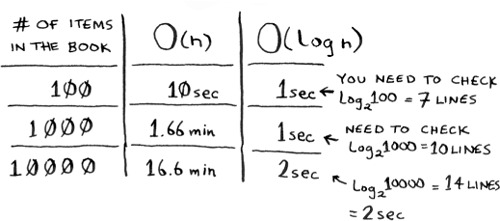

You already know that binary search is darn fast. But as a cashier, looking things up in a book is a pain, even if the book is sorted. You can feel the customer steaming up as you search for items in the book. What you really need is a buddy who has all the names and prices memorized. Then you don’t need to look up anything: you ask her, and she tells you the answer         instantly.

Your buddy Maggie can give you the price in O(1) time for any item, no matter how big the book is. She’s even faster than binary search.

What a wonderful person! How do you get a “Maggie”?

> 你已经知道，二进制搜索是非常快的。但是作为一个收银员，在书中寻找东西是一件很痛苦的事情，即使书是分类的。当你在书中寻找物品时，你能感觉到顾客在冒烟。你真正需要的是一个能记住所有名称和价格的伙伴。这样你就不需要查任何东西了：你问她，她就会立刻告诉你答案。
>
> 你的伙伴麦琪可以在O(1)时间内给你任何物品的价格，不管这本书有多大。她甚至比二分查找还要快。
>
> 多么好的一个人啊! 如何获得 "麦琪"？

Let’s put on our data structure hats. You know two data structures so far: arrays and lists (I won’t talk about stacks because you can’t really “search” for something in a stack). You could implement this book as an array.

> 让我们戴上数据结构的帽子。到目前为止，你知道两种数据结构：数组和列表（我不会谈论堆栈，因为你不能真正在堆栈中 "搜索 "东西）。你可以把这本书作为一个数组来实现。

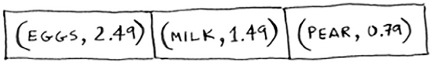

Each item in the array is really two items: one is the name of a kind of produce, and the other is the price. If you sort this array by name, you can run binary search on it to find the price of an item. So you can find items in O(log *n*) time. But you want to find items in O(1) time. That is, you want to make a “Maggie.” That’s where hash functions come in.

> 数组中的每个项目实际上是两个项目：一个是一种农产品的名称，另一个是价格。如果你按名称对这个数组进行排序，你就可以在上面运行二进制搜索来找到一个项目的价格。所以你可以在O(log *n*)时间内找到物品。但是你想在O(1)时间内找到物品。也就是说，你想做一个 "麦琪"。这就是哈希函数的作用。

## Hash Functions

A hash function is a function where you put in a string and you get back a number. *String* here means any kind of data—a sequence of bytes.

> 哈希函数是一个函数，你把一个字符串放进去，你得到一个数字。这里的*String*指的是任何一种数据--一个字节的序列。

In technical terminology, we’d say that a hash function “maps strings to numbers.” You might think there’s no discernable pattern to what number you get out when you put a string in. But there are some requirements for a hash function:      

- It needs to be consistent. For example, suppose you put in “apple” and get back “4”. Every time you put in “apple”, you should get “4” back. Without this, your hash table won’t work.                     
- It should map different words to different numbers. For example, a hash function is no good if it always returns “1” for any word you put in. In the best case, every different word should map to a different number.

> 用技术术语来说，我们会说哈希函数 "将字符串映射为数字"。你可能会认为，当你把一个字符串放进去时，你得到的数字没有任何可识别的模式。但对哈希函数有一些要求。     
>
> - 它必须是一致的。例如，假设你输入了 "苹果"，得到的是 "4"。每次你输入 "苹果"，你都应该得到 "4 "。没有这一点，你的哈希表就不会工作。                    
> - 它应该把不同的词映射到不同的数字。例如，如果一个哈希函数总是为你输入的任何单词返回 "1"，那么它就不是好东西。在最好的情况下，每个不同的词都应该映射到一个不同的数字。

So a hash function maps strings to numbers. What is that good for? Well, you can use it to make your “Maggie”! Start with an empty array: 

> 因此，哈希函数将字符串映射为数字。这有什么用呢？嗯，你可以用它来制作你的 "Maggie"! 从一个空数组开始。

You’ll store all of your prices in this array. Let’s add the price of an apple. Feed “apple” into the hash function. The hash function outputs “3”. So let’s store the price of an apple at index 3 in the array. Let’s add milk. Feed “milk” into the hash function. The hash function says “0”. Let’s store the price of milk at index 0. Keep going, and eventually the whole array will be full of prices.

Now you ask, “Hey, what’s the price of an avocado?” You don’t need to search for it in the array. Just feed “avocado” into the hash function. It tells you that the price is stored at index 4. And sure enough, there it is.

> 你将在这个数组中存储你所有的价格。让我们添加一个苹果的价格。将 "苹果 "输入哈希函数。哈希函数输出 "3"。因此，让我们把苹果的价格存储在数组中的索引3。让我们添加牛奶。将 "牛奶 "输入哈希函数。哈希函数显示 "0"。让我们把牛奶的价格存储在索引0处。继续下去，最终整个数组将充满价格。
>
> 现在你问，"嘿，牛油果的价格是多少？" 你不需要在数组中搜索它。只要把 "牛油果 "输入哈希函数。它告诉你，价格被存储在索引4处。果然，它就在那里。

The hash function tells you exactly where the price is stored, so you don’t have to search at all! This works because      

- The hash function consistently maps a name to the same index. Every time you put in “avocado”, you’ll get the same number back. So you can use it the first time to find where to store the price of an avocado, and then you can use it to find where you stored that price.                     
- The hash function maps different strings to different indexes. “Avocado” maps to index 4. “Milk” maps to index 0. Everything maps to a different slot in the array where you can store its price.                     
- The hash function knows how big your array is and only returns valid indexes. So if your array is 5 items, the hash function doesn’t return 100 ... that wouldn’t be a valid index in the array.

> 哈希函数准确地告诉你价格的存储位置，所以你根本不需要搜索! 这样做的原因是      
>
> - 哈希函数始终将一个名字映射到相同的索引。每次你输入 "牛油果"，你都会得到相同的数字。因此，你可以在第一次使用它来寻找储存牛油果价格的地方，然后你可以使用它来寻找你储存该价格的地方。                    
> - 哈希函数将不同的字符串映射到不同的索引中。"牛油果 "映射到索引4。"牛奶 "映射到索引0。所有东西都映射到数组中不同的槽，你可以在那里存储它的价格。                    
> - 哈希函数知道你的数组有多大，只返回有效的索引。因此，如果你的数组有5个项目，哈希函数不会返回100......那就不是数组中的有效索引。

You just built a “Maggie”! Put a hash function and an array together, and you get a data structure called a *hash table*. A hash table is the first data structure you’ll learn that has some extra logic behind it. Arrays and lists map straight to memory, but hash tables are smarter. They use a hash function to intelligently figure out where to store elements.

Hash tables are probably the most useful complex data structure you’ll learn. They’re also known as hash maps, maps, dictionaries, and associative arrays. And hash tables are fast! Remember our discussion of arrays and linked lists back in [chapter 2](ms-local-stream://EpubReader_AC72D530066DA71DBA289EF8C2FE2E4D915D872E9F520716C4ECA9F5D94B14/Content/OEBPS/kindle_split_008.xhtml#ch02)? You can get an item from an array instantly. And hash tables use an array to store the data, so they’re equally fast.

You’ll probably never have to implement hash tables yourself. Any good language will have an implementation for hash tables. Python has hash tables; they’re called *dictionaries*. You can make a new hash table using the dict function:

> 你刚刚建立了一个 "麦琪"! 把一个哈希函数和一个数组放在一起，你就得到了一个叫做*哈希表*的数据结构。哈希表是你将学习的第一个数据结构，它背后有一些额外的逻辑。数组和列表直接映射到内存，但哈希表更聪明。它们使用一个哈希函数来智能地计算出元素的存储位置。
>
> 哈希表可能是你将要学习的最有用的复杂数据结构。它们也被称为哈希图、地图、字典和关联数组。而且，哈希表的速度非常快! 还记得我们在[第2章](ms-local-stream://EpubReader_AC72D530066DA71DBA289EF8C2FE2E4D915D872E9F520716C4ECA9F5D94B14/Content/OEBPS/kindle_split_008.xhtml#ch02)中对数组和链接列表的讨论吗？你可以立即从一个数组中获得一个项目。而哈希表使用数组来存储数据，所以它们同样快速。
>
> 你可能永远不需要自己去实现哈希表。任何好的语言都会有哈希表的实现。Python 有哈希表；它们被称为 *dictionaries*。你可以使用 dict 函数制作一个新的哈希表：

In [2]:
book = dict()
book

{}

book is a new hash table. Let’s add some prices to book:

In [4]:
book["apple"] = 0.67    # an apple cost 67 cents
book["milk"] = 1.49
book["avocado"] = 1.49
print(book)

{'apple': 0.67, 'milk': 1.49, 'avocado': 1.49}


Pretty easy! Now let’s ask for the price of an avocado: 

In [5]:
print(book["avocado"])

1.49


A hash table has keys and values. In the book hash, the names of produce are the keys, and their prices are the values. A hash table maps keys to values.

In the next section, you’ll see some examples where hash tables are really useful.

> 一个哈希表有键和值。在这本书中，农产品的名称是键，它们的价格是值。哈希表将键映射到值。
>
> 在下一节中，你会看到一些哈希表真正有用的例子。

### Exercises      

It’s important for hash functions to consistently return the same output for the same input. If they don’t, you won’t be able to find your item after you put it in the hash table!      

Which of these hash functions are consistent?

**5.1**

return "1" for all input: f(x) = 1

**5.2**

return a random number every time: f(x) = rand()

**5.3**

return the index of the next empty slot in the hash table: f(x) = next_empty_slot()

**5.4**

uses the length of the string as the index: f(x) = len(x)

5.1 & 5.4

## Use cases

Hash tables are used everywhere. This section will show you a few use cases.

### Using hash tables for lookups

Your phone has a handy phonebook built in. Each name has a phone number associated with it.

Suppose you want to build a phone book like this. You’re mapping people’s names to phone numbers. Your phone book needs to have this functionality:

- Add a person’s name and the phone number associated with that person.                     
- Enter a person’s name, and get the phone number associated with that name.

This is a perfect use case for hash tables! Hash tables are great when you want to

- Create a mapping from one thing to another thing                     
- Look something up                     

Building a phone book is pretty easy. First, make a new hash table:

In [6]:
phone_book = dict()
phone_book

{}

By the way, Python has a shortcut for making a new hash table. You can use two curly braces:

In [7]:
phone_book = {}

Let’s add the phone numbers of some people into this phone book:

In [9]:
phone_book["jenny"] = 8675309
phone_book["emergency"] = 911

That’s all there is to it! Now, suppose you want to find Jenny’s phone number. Just pass the key in to the hash:

In [10]:
print(phone_book["jenny"])

8675309


Imagine if you had to do this using an array instead. How would you do it? Hash tables make it easy to model a relationship from one item to another.      

Hash tables are used for lookups on a much larger scale. For example, suppose you go to a website like [http://adit.io](http://adit.io/). Your computer has to translate adit.io to an IP address.

> 想象一下，如果你不得不用一个数组来做这件事。你会怎么做呢？哈希表使得建立一个从一个项目到另一个项目的关系变得容易。     
>
> 哈希表被用于更大规模的查询。例如，假设你去一个网站，如[http://adit.io](http://adit.io/)。你的电脑必须把adit.io翻译成一个IP地址。

For any website you go to, the address has to be translated to an IP address.

Wow, mapping a web address to an IP address? Sounds like a perfect use case for hash tables! This process is called *DNS resolution*. Hash tables are one way to provide this functionality.

### Preventing duplicate entries

Suppose you’re running a voting booth. Naturally, every person can vote just once. How do you make sure they haven’t voted before? When someone comes in to vote, you ask for their full name. Then you check it against the list of people who have voted.

If their name is on the list, this person has already voted—kick them out! Otherwise, you add their name to the list and let them vote. Now suppose a lot of people have come in to vote, and the list of people who have voted is really long.

Each time someone new comes in to vote, you have to scan this giant list to see if they’ve already voted. But there’s a better way: use a hash!      

First, make a hash to keep track of the people who have voted:

> 假设你在经营一个投票站。自然，每个人只能投一次票。你如何确定他们以前没有投过票？当有人来投票时，你要问他们的全名。然后，你将其与已经投票的人的名单进行核对。
>
> 如果他们的名字在名单上，这个人已经投过票了--把他们赶出去！否则，你就把他们的名字加到名单上。否则，你就把他们的名字加到名单上，让他们投票。现在，假设有很多人进来投票，而且已经投票的人的名单非常长。
>
> 每次有新的人进来投票，你都要扫描这个巨大的名单，看看他们是否已经投票了。但是，有一个更好的方法：使用哈希值!      
>
> 首先，建立一个哈希值来跟踪已经投票的人。

In [11]:
voted = {}

When someone new comes in to vote, check if they’re already in the hash:

In [13]:
value = voted.get("tom")

The get function returns the value if “tom” is in the hash table. Otherwise, it returns None. You can use this to check if someone has already voted!

Here’s the code:

In [14]:
voted = {}

def check_voter(name):
    if voted.get(name):
        print("kick them out!")
    else:
        voted[name] = True
        print("let them vote!")

Let’s test it a few times:

In [15]:
check_voter("tom")

let them vote!


In [16]:
check_voter("mike")

let them vote!


In [17]:
check_voter("mike")

kick them out!


The first time Tom goes in, this will print, “let them vote!” Then Mike goes in, and it prints, “let them vote!” Then Mike tries to go a second time, and it prints, “kick them out!”      

Remember, if you were storing these names in a list of people who have voted, this function would eventually become really slow, because it would have to run a simple search over the entire list. But you’re storing their names in a hash table instead, and a hash table instantly tells you whether this person’s name is in the hash table or not. Checking for duplicates is very fast with a hash table.

> 汤姆第一次进去的时候，会打印出 "让他们投票！" 然后迈克进去了，它打印出："让他们投票！" 然后迈克试图第二次进去，它就会打印，"把他们赶出去！"      
>
> 记住，如果你把这些名字存储在一个已经投票的人的列表中，这个函数最终会变得非常慢，因为它必须在整个列表中进行简单的搜索。但是你把他们的名字存储在一个哈希表中，而哈希表会立即告诉你这个人的名字是否在哈希表中。用哈希表检查重复的信息是非常快的。

### Using hash tables as a cache

One final use case: caching. If you work on a website, you may have heard of caching before as a good thing to do. Here’s the idea. Suppose you visit facebook.com:      

1. You make a request to Facebook’s server.                     
2. The server thinks for a second and comes up with the web page to send to you.                     
3. You get a web page.

> 最后一个用例：缓存。如果你在一个网站上工作，你可能已经听说过缓存是一件好事。这是一个想法。假设你访问facebook.com。     
>
> 1. 你向Facebook的服务器发出一个请求。                    
> 2. 2.服务器思考一秒钟，然后想出要发送给你的网页。                    
> 3. 你得到一个网页。

For example, on Facebook, the server may be collecting all of your friends’ activity to show you. It takes a couple of seconds to collect all that activity and shows it to you. That couple of seconds can feel like a long time as a user. You might think, “Why is Facebook being so slow?” On the other hand, Facebook’s servers have to serve millions of people, and that couple of seconds adds up for them. Facebook’s servers are really working hard to serve all of those websites. Is there a way to make Facebook faster and have its servers do less work at the same time? 

Suppose you have a niece who keeps asking you about planets. “How far is Mars from Earth?” “How far is the Moon?” “How far is Jupiter?” Each time, you have to do a Google search and give her an answer. It takes a couple of minutes. Now, suppose she always asked, “How far is the Moon?” Pretty soon, you’d memorize that the Moon is 238,900 miles away. You wouldn’t have to look it up on Google ... you’d just remember and answer. This is how caching works: websites remember the data instead of recalculating it.         

If you’re logged in to Facebook, all the content you see is tailored just for you. Each time you go to facebook.com, its servers have to think about what content you’re interested in. But if you’re not logged in to Facebook, you see the login page. Everyone sees the same login page. 

Facebook is asked the same thing over and over: “Give me the home page when I’m logged out.” So  it stops making the server do work to figure out what the home page looks like. Instead, it memorizes what the home page looks like and sends it to you.

> 例如，在Facebook上，服务器可能正在收集你所有朋友的活动来向你展示。它需要几秒钟的时间来收集所有的活动并向你展示。作为一个用户，这几秒钟的时间可能会感觉很漫长。你可能会想，"为什么Facebook这么慢？" 另一方面，Facebook的服务器必须为数以百万计的人提供服务，这几秒钟的时间对他们来说是很重要的。Facebook的服务器确实在努力工作，为所有这些网站提供服务。有没有办法让Facebook更快，同时让其服务器做更少的工作？
>
> 假设你有一个侄女，她一直在问你关于行星的问题。"火星离地球有多远？" "月球有多远？" "木星有多远？" 每一次，你都要在谷歌上搜索并给她一个答案。这需要几分钟的时间。现在，假设她总是问，"月球有多远？" 很快，你就会记住月球在238,900英里之外。你不必在谷歌上查找它......你只需记住并回答。这就是缓存的工作原理：网站记住了数据，而不是重新计算它。        
>
> 如果你登录了Facebook，你看到的所有内容都是为你量身定做的。每次你去facebook.com，它的服务器都要思考你对什么内容感兴趣。但是，如果你没有登录到Facebook，你看到的是登录页面。每个人都看到同样的登录页面。
>
> Facebook一次又一次地被要求做同样的事情。"当我注销时，给我主页"。因此，它不再让服务器做工作来弄清主页是什么样子。相反，它记住了主页的模样，并将其发送给你。

This is called *caching*. It has two advantages:  

- You get the web page a lot faster, just like when you memorized the distance from Earth to the Moon. The next time your niece asks you, you won’t have to Google it. You can answer instantly.                     
- Facebook has to do less work.

> 这被称为*缓存*。它有两个好处。 
>
> - 你可以更快地得到网页，就像你记住了从地球到月球的距离。下次你的侄女问你时，你不必再去谷歌。你可以立即回答。                    
> - Facebook要做的工作更少。

Caching is a common way to make things faster. All big websites use caching. And that data is cached in a hash!

Facebook isn’t just caching the home page. It’s also caching the About page, the Contact page, the Terms and Conditions page, and a lot more. So it needs a mapping from page URL to page data.

When you visit a page on Facebook, it first checks whether the page is stored in the hash.

> 缓存是一种常见的使事情变得更快的方法。所有大型网站都使用缓存。而这些数据被缓存在一个哈希值中!
>
> Facebook不只是缓存主页。它还缓存了 "关于 "页面、"联系 "页面、"条款和条件 "页面，以及更多。所以它需要一个从页面URL到页面数据的映射。
>
> 当你访问Facebook上的一个页面时，它首先检查该页面是否被存储在哈希中。

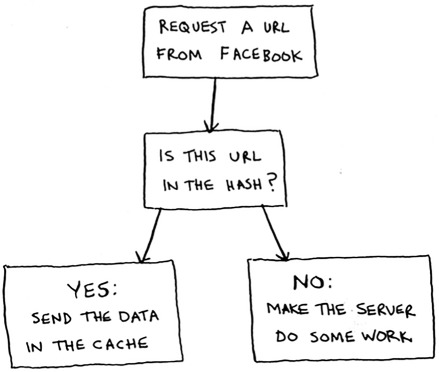

Here it is in code:

In [18]:
cache = {}

def get_page(url):
    if cache.get(url):
        return cache[url]    # return cache data
    else:
        data = get_data_from_server(url)
        cache[url] = data    # save this data in your cache first
        return data

Here, you make the server do work only if the URL isn’t in the cache. Before you return the data, though, you save it in the cache. The next time someone requests this URL, you can send the data from the cache instead of making the server do the work.

> 在这里，你让服务器只在URL不在缓存中的情况下进行工作。不过在你返回数据之前，你把它保存在缓存中。下次有人请求这个URL时，你可以从缓存中发送数据，而不是让服务器做这些工作。

### Recap

To recap, hashes are good for  

- Modeling relationships from one thing to another thing                     
- Filtering out duplicates                     
- Caching/memorizing data instead of making your server do work

> 简而言之，哈希值适用于  
>
> - 建立从一个事物到另一个事物的关系模型                     
> - 过滤掉重复的数据                     
> - 缓存/记忆数据，而不是让你的服务器做工作

## Collisions

Like I said earlier, most languages have hash tables. You don’t need to know how to write your own. So, I won’t talk about the internals of hash tables too much. But you still care about performance! To understand the performance of hash tables, you first need to understand what collisions are. The next two sections cover collisions and performance.

First, I’ve been telling you a white lie. I told you that a hash function always maps different keys to different slots in the array.

> 就像我之前说的，大多数语言都有哈希表。你不需要知道如何写你自己的。所以，我不会过多地谈论哈希表的内部结构。但是，你仍然关心性能问题! 要了解哈希表的性能，你首先需要了解什么是碰撞。接下来的两节将介绍碰撞和性能。
>
> 首先，我一直在告诉你一个善意的谎言。我告诉你，一个哈希函数总是将不同的键映射到数组中的不同槽。

In reality, it’s almost impossible to write a hash function that does this. Let’s take a simple example. Suppose your array contains 26 slots. And your hash function is really simple: it assigns a spot in the array alphabetically.

Maybe you can already see the problem. You want to put the price of apples in your hash. You get assigned the first slot. Then you want to put the price of bananas in the hash. You get assigned the second slot. Everything is going so well! But now you want to put the price of avocados in your hash. You get assigned the first slot again.

Oh no! Apples have that slot already! What to do? This is called a *collision*: two keys have been assigned the same slot. This is a problem. If you store the price of avocados at that slot, you’ll overwrite the price of apples. Then the next time someone asks for the price of apples, they will get the price of avocados instead! Collisions are bad, and you need to work around them. There are many different ways to deal with collisions. The simplest one is this: if multiple keys map to the same slot, start a linked list at that slot.

In this example, both “apple” and “avocado” map to the same slot.(why?) So you start a linked list at that slot. If you need to know the price of bananas, it’s still quick. If you need to know the price of apples, it’s a little slower. You have to search through this linked list to find “apple”. If the linked list is small, no big deal—you have to search through three or four elements. But suppose you work at a grocery store where you only sell produce that starts with the letter *A*.

Hey, wait a minute! The entire hash table is totally empty except for one slot. And that slot has a giant linked list! Every single element in this hash table is in the linked list. That’s as bad as putting everything in a linked list to begin with. It’s going to slow down your hash table.

There are two lessons here:

- ***Your hash function is really important.*** Your hash function mapped all the keys to a single slot. Ideally, your hash function would map keys evenly all over the hash.                     
- If those linked lists get long, it slows down your hash table a lot. But they won’t get long if you *use a good hash function*!                     

Hash functions are important. A good hash function will give you very few collisions. So how do you pick a good hash function? That’s coming up in the next section!

## Performance

You started this chapter at the grocery store. You wanted to build something that would give you the prices for produce *instantly*. Well, hash tables are really fast.

In the average case, hash tables take O(1) for everything. O(1) is called *constant time*. You haven’t seen constant time before. It doesn’t mean instant. It means the time taken will stay the same, regardless of how big the hash table is. For example, you know that simple search takes linear time. Binary search is faster—it takes log time: Looking something up in a hash table takes constant time.

See how it’s a flat line? That means it doesn’t matter whether your hash table has 1 element or 1 billion elements—getting something out of a hash table will take the same amount of time. Actually, you’ve seen constant time before. Getting an item out of an array takes constant time. It doesn’t matter how big your array is; it takes the same amount of time to get an element. In the average case, hash tables are really fast.      

In the worst case, a hash table takes O(*n*)—linear time—for everything, which is really slow. Let’s compare hash tables to arrays and lists.

Look at the average case for hash tables. Hash tables are as fast as arrays at searching (getting a value at an index). And they’re as fast as linked lists at inserts and deletes. It’s the best of both worlds! But in the worst case, hash tables are slow at all of those. So it’s important that you don’t hit worst-case performance with hash tables. And to do that, you need to avoid collisions. To avoid collisions, you need

- A low load factor                     
- A good hash function

**Note**

Before you start this next section, know that this isn’t required reading. I’m going to talk about how to implement a hash table, but you’ll never have to do that yourself. Whatever programming language you use will have an implementation of hash tables built in. You can use the built-in hash table and assume it will have good performance. The next section gives you a peek under the hood.

### Load factor

The load factor of a hash table is easy to calculate. Hash tables use an array for storage, so you count the number of occupied slots in an array. For example, this hash table has a load factor of ⅖, or 0.4.

What’s the load factor of this hash table? If you said ⅓, you’re right. Load factor measures how many empty slots remain in your hash table.

Suppose you need to store the price of 100 produce items in your hash table, and your hash table has 100 slots. In the best case, each item will get its own slot. This hash table has a load factor of 1. What if your hash table has only 50 slots? Then it has a load factor of 2. There’s         no way each item will get its own slot, because there aren’t enough slots! Having a load factor greater than 1 means you have more items than slots in your array. 

Once the load factor starts to grow, you need to add more slots to your hash table. This is called *resizing*. For example, suppose you have this hash table that is getting pretty full.

You need to resize this hash table. First you create a new array that’s bigger. The rule of thumb is to make an array that is twice the size. Now you need to re-insert all of those items into this new hash table using the hash function:

This new table has a load factor of ⅜. Much better! With a lower load factor, you’ll have fewer collisions, and your table will perform better. A good rule of thumb is, resize when your load factor is greater than 0.7.      

You might be thinking, “This resizing business takes a lot of time!” And you’re right. Resizing is expensive, and you don’t want to resize too often. But averaged out, hash tables take O(1) even with resizing.

### A good hash function

A good hash function distributes values in the array evenly. A bad hash function groups values together and produces a lot of collisions. What is a good hash function? That’s something you’ll never have to worry about—old men (and women) with big beards sit in         dark rooms and worry about that. If you’re really curious, look up the SHA function (there’s a short description of it in the last chapter). You could use that as your hash function.

### **Exercises**

It’s important for hash functions to have a good distribution. They should map items as broadly as possible. The worst case is a hash function that maps all items to the same slot in the hash table.      

Suppose you have these four hash functions that work with strings:

1. Return “1” for all input.
2. Use the length of the string as the index.                     
3. Use the first character of the string as the index. So, all strings starting with *a* are hashed together, and so on.                     
4. Map every letter to a prime number: a = 2, b = 3, c = 5, d = 7, e = 11, and so on. For a string, the hash function is the sum of all the characters modulo the size of the hash. For example, if your hash size is 10, and the string is “bag”, the index is (3 + 2 + 17) % 10 = 22 % 10 = 2.

For each of these examples, which hash functions would provide a good distribution? Assume a hash table size of 10 slots.

> 散列函数有一个良好的分布是很重要的。它们应该尽可能广泛地映射项目。最糟糕的情况是，一个散列函数将所有项目都映射到散列表中的同一个槽。     
>
> 假设你有这四个处理字符串的哈希函数。
>
> 1. 对所有输入返回 "1"。
> 2. 使用字符串的长度作为索引。                    
> 3. 使用字符串的第一个字符作为索引。因此，所有以*a*开始的字符串都被散列在一起，以此类推。                    
> 4. 将每个字母映射为一个质数：a=2，b=3，c=5，d=7，e=11，以此类推。对于一个字符串来说，哈希函数是所有字符的总和，再加上哈希的大小。例如，如果你的散列大小是10，而字符串是 "bag"，索引是(3 + 2 + 17) % 10 = 22 % 10 = 2。
>
> 对于这些例子中的每一个，哪些哈希函数会提供一个好的分布？假设哈希表的大小为10个槽。

number 4

**5.5** 

A phonebook where the keys are names and values are phone numbers. The names are as follows: Esther, Ben, Bob, and Dan.

**5.6** 

A mapping from battery size to power. The sizes are A, AA, AAA, and AAAA.

**5.7** 

A mapping from book titles to authors. The titles are *Maus*, *Fun Home*, and *Watchmen*.

> **5.5** 
>
> 一个电话簿，其中的键是名字，值是电话号码。这些名字如下。Esther, Ben, Bob, and Dan.
>
> **5.6** 
>
> 一个从电池尺寸到功率的映射。尺寸为A、AA、AAA和AAAA。
>
> **5.7** 
>
> 从书名到作者的映射。书名是*Maus*，*Fun Home*，和*Watchmen*。

In [6]:
## 5.5
phonebook = {x:y for x in ("Maus", "Fun Home", "Watchmen") for y in (1,2,3)}
phonebook

{'Maus': 3, 'Fun Home': 3, 'Watchmen': 3}

## Recap

You’ll almost never have to implement a hash table yourself. The programming language you use should provide an implementation for you. You can use Python’s hash tables and assume that you’ll get the average case performance: constant time.      

Hash tables are a powerful data structure because they’re so fast and they let you model data in a different way. You might soon find that you’re using them all the time:      

- You can make a hash table by combining a hash function with an array.                     
- Collisions are bad. You need a hash function that minimizes collisions.                     
- Hash tables have really fast search, insert, and delete.                     
- Hash tables are good for modeling relationships from one item to another item.                     
- Once your load factor is greater than .07, it’s time to resize your hash table.                     
- Hash tables are used for caching data (for example, with a web server).                     
- Hash tables are great for catching duplicates.